In [1]:
# 关联性：散点图、矩阵图、热力图、日历热力图

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 散点图

In [4]:
x = np.random.randn(100)
y = np.random.randn(100)*0.5 + np.random.randn(1)

In [5]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

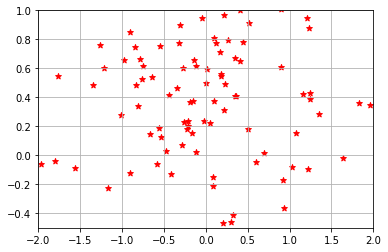

In [6]:
plt.scatter(x=x,y=y,color='red',marker='*')
plt.xlim(-2,2)
plt.ylim(-0.5,1)
plt.grid()

In [7]:
# 获取数据：订单数据
data = pd.read_excel('order2019.xlsx')
data.describe()

,id,orderAmount,payment
count,104557.000000,104557.000000,104557.000000
mean,52279.000000,1049.681521,1167.494225
std,30183.150385,1054.409968,2174.024855
min,1.000000,6.100000,-12.470000
25%,26140.000000,432.040000,383.660000
50%,52279.000000,679.320000,641.230000
75%,78418.000000,1248.280000,1252.630000
max,104557.000000,28465.250000,83270.053829


In [8]:
data.head()

,id,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
0,1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
1,2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
2,3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
3,4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
4,5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


In [9]:
# 探索：商品均价 vs 销售数量的相关性
types = data['goodsID'].unique().tolist()
len(types)

1001

In [10]:
prices = []
amounts = []

for t in types:
    price = data[data['goodsID']==t]['orderAmount'].mean()
    amount = len(data[data['goodsID']==t])
    
    prices.append(price)
    amounts.append(amount)


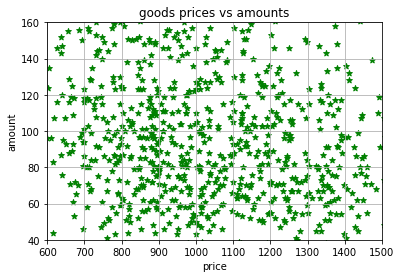

In [11]:
# 绘制散点图

plt.scatter(x=prices,y=amounts,color='green',marker='*')

plt.title('goods prices vs amounts')
plt.xlabel('price')
plt.ylabel('amount')

plt.xlim(600,1500)
plt.ylim(40,160)
plt.grid()

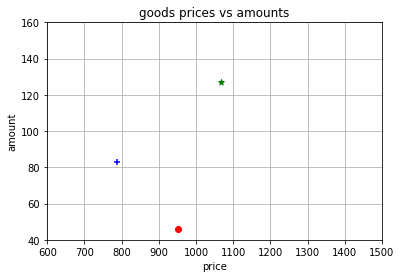

In [12]:
# 随机比较和可视化3个商品的订单和销售情况

prices = []
amounts = []

for t in ['PR000064','PR000582','PR000302']:
    price = data[data['goodsID']==t]['orderAmount'].mean()
    amount = len(data[data['goodsID']==t])
    
    prices.append(price)
    amounts.append(amount)
    
plt.scatter(x=prices[0],y=amounts[0],color='green',marker='*')
plt.scatter(x=prices[1],y=amounts[1],color='red')
plt.scatter(x=prices[2],y=amounts[2],color='blue',marker='+')

plt.title('goods prices vs amounts')
plt.xlabel('price')
plt.ylabel('amount')

plt.xlim(600,1500)
plt.ylim(40,160)
plt.grid()

In [13]:
# 热力图：散点图坐标轴为数值型数据，热力图类别型数据，体现的是两组变量的相关性

In [14]:
# 案例背景：工厂出货品质的好坏
factories = ['fac1','fac2','fac3','fac4','fac5']
quanlity = ['bad','poor','general','good','great']
result = np.round(np.random.random(25).reshape(5,5),1)
result

array([[0.8, 0.2, 1. , 0.8, 0.8],
       [0.6, 0.2, 0.9, 0.5, 0. ],
       [0.4, 0.7, 0.9, 0.5, 0.3],
       [0.5, 0.6, 0.8, 0.7, 0.2],
       [0.7, 0.3, 0.2, 0.2, 0.9]])

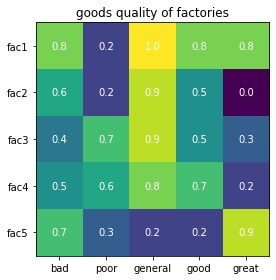

In [18]:
fig,ax = plt.subplots(1,1)

ax.imshow(result)

# 轮流锁定单元格
for i in np.arange(len(factories)):
    for j in np.arange(len(quanlity)):
        plt.text(j,i,result[i][j],color='w',ha='center',va='center')
        
# 设置坐标轴的类别数据标签
ax.set_xticks(np.arange(len(quanlity)))
ax.set_yticks(np.arange(len(factories)))
ax.set_xticklabels(quanlity)
ax.set_yticklabels(factories)

# 修饰工作
ax.set_title('goods quality of factories')
fig.tight_layout()